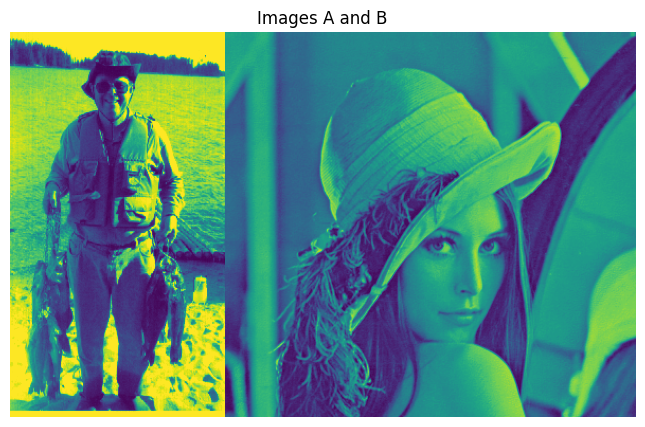

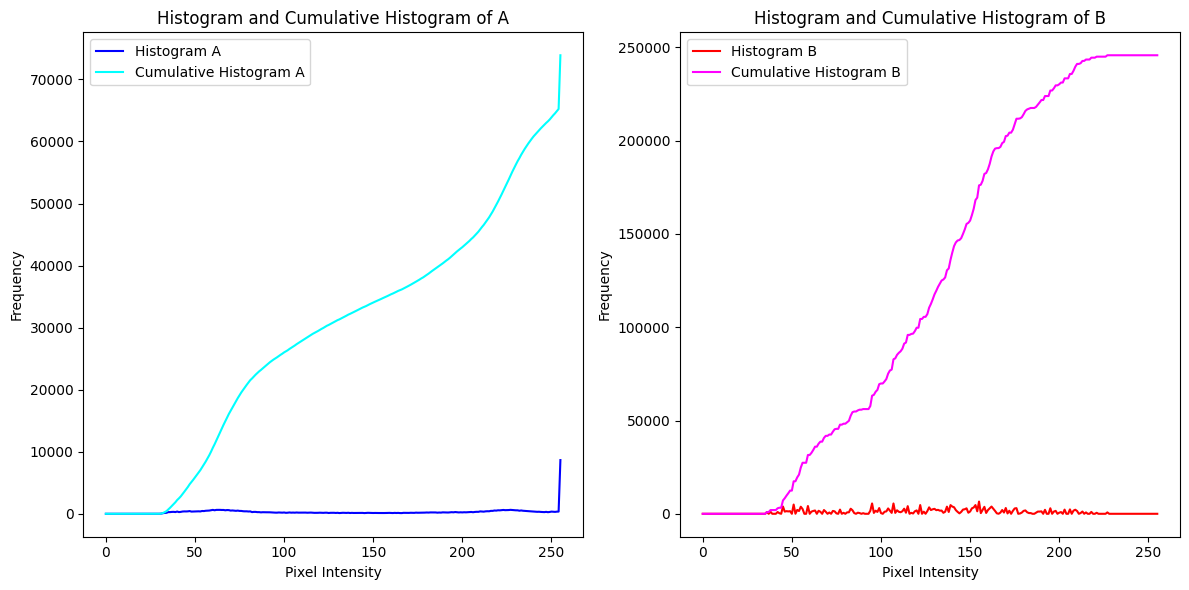

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the images using Pillow
A = Image.open('EightAM.png')
B = Image.open('LENA.png')

# Convert images to NumPy arrays
A = np.array(A)
B = np.array(B)

# Resize images to the same height
height_A, width_A = A.shape[:2]
height_B, width_B = B.shape[:2]

# Determine the new height and maintain aspect ratio
new_height = min(height_A, height_B)
A_resized = np.array(Image.fromarray(A).resize((int(width_A * new_height / height_A), new_height)))
B_resized = np.array(Image.fromarray(B).resize((int(width_B * new_height / height_B), new_height)))

# Show the images side-by-side
combined_image = np.hstack((A_resized, B_resized))
plt.figure(figsize=(10, 5))
plt.imshow(combined_image)
plt.title('Images A and B')
plt.axis('off')
plt.show()

# Get the histograms and cumulative histograms
ha, _ = np.histogram(A.flatten(), bins=256, range=[0, 256])
cha = np.cumsum(ha)

hb, _ = np.histogram(B.flatten(), bins=256, range=[0, 256])
chb = np.cumsum(hb)

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ha, color='blue', label='Histogram A')
plt.plot(cha, color='cyan', label='Cumulative Histogram A')
plt.title('Histogram and Cumulative Histogram of A')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hb, color='red', label='Histogram B')
plt.plot(chb, color='magenta', label='Cumulative Histogram B')
plt.title('Histogram and Cumulative Histogram of B')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()